In [102]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix  
%matplotlib inline

In [3]:
transform = transforms.ToTensor()

In [4]:
train_data = datasets.MNIST(root="../../Data/", train=True, download=True, transform=transform)
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../../Data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data = datasets.MNIST(root="../../Data", train=False, download=True, transform=transform)
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
print(type(train_data))
train_data[0]

<class 'torchvision.datasets.mnist.MNIST'>


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [7]:
image, label = train_data[0]
print(image.shape)
print(label)

torch.Size([1, 28, 28])
5


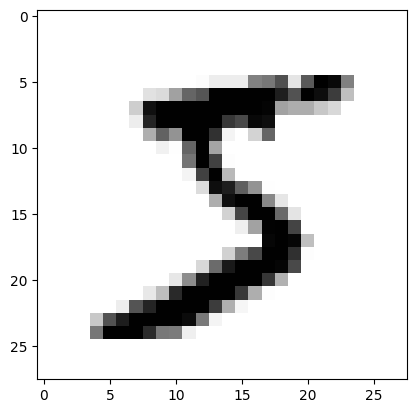

In [8]:
plt.imshow(image.reshape((28, 28)), cmap='gist_yarg')

In [9]:
image.reshape((28, 28)).shape

torch.Size([28, 28])

In [10]:
torch.manual_seed(101)

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [11]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))# Formatting

In [12]:
for images, labels in train_loader:
    break
print(images.shape)
print(labels.shape)


torch.Size([100, 1, 28, 28])
torch.Size([100])


In [13]:
labels

tensor([7, 2, 3, 5, 8, 5, 3, 6, 9, 9, 1, 3, 5, 5, 4, 5, 4, 1, 0, 4, 5, 4, 5, 4,
        0, 5, 8, 2, 2, 3, 3, 7, 2, 8, 1, 2, 3, 1, 7, 9, 0, 4, 9, 1, 7, 9, 7, 2,
        6, 5, 5, 8, 5, 0, 4, 0, 0, 4, 9, 2, 6, 0, 8, 4, 1, 8, 5, 2, 0, 3, 3, 4,
        6, 1, 5, 3, 5, 9, 0, 7, 4, 5, 3, 6, 6, 4, 5, 3, 9, 7, 1, 7, 6, 7, 9, 3,
        5, 9, 9, 6])

In [16]:
# im.shape

Labels :  [   7    2    3    5    8    5    3    6    9    9    1    3]


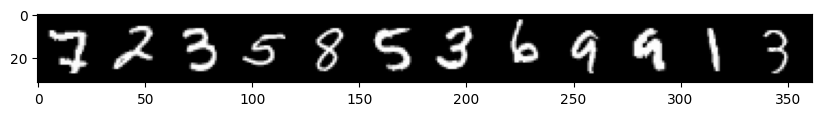

In [17]:
#Print the first 12 labels
print('Labels : ', labels[:12].numpy())

# Print first 12 images
im = make_grid(images[:12], nrow=12)#Default nrow is 8
plt.figure(figsize=(10,4))
# We need to transpose the image from the CWH to WHC
# CWH:- Colour channel width height
# WHC:- Wodth height colour channel
plt.imshow(np.transpose(im.numpy(), (1,2,0)));

In [73]:
class MultiLayerPerceptorn(nn.Module):
    def __init__(self, in_sz=784, out_sz=10, layers=[120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_features=in_sz, out_features=layers[0])
        self.fc2 = nn.Linear(in_features=layers[0], out_features=layers[1])
        self.fc3 = nn.Linear(in_features=layers[1], out_features=out_sz)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X,dim=1)

In [74]:
torch.manual_seed(101)
model = MultiLayerPerceptorn()
model

MultiLayerPerceptorn(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [75]:
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [76]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [77]:
images.shape

torch.Size([100, 1, 28, 28])

In [78]:
images.view(100, -1).shape

torch.Size([100, 784])

In [79]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../../Data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [80]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [81]:
import time
start_time = time.time()

#TRAINING
epochs = 10

#TRACKERS
train_losses = []
test_losses = []
train_correct = []
test_correct = []
for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    # Run training batches
    for b, (X_train,y_train) in enumerate(train_loader):
        b += 1
        # print(f"Here is the {b}")
        y_pred = model(X_train.view(100, -1))# Flat the image
        loss = criterion(y_pred, y_train)

        #Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        # updated parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')

    # Update train loss & accuracy for the epoch    
    train_losses.append(loss)
    train_correct.append(trn_corr)

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            # Apply the model
            y_val = model(X_test.view(500, -1))#Flat the image

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

    # Update test loss & accuracy for the epoch
    losses = criterion(y_val, y_test)
    test_losses.append(losses)
    test_correct.append(tst_corr)

totaltime = time.time() - start_time
print(f"Duration : {totaltime/60} mins")

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.23562384  accuracy:  83.245%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.35330707  accuracy:  87.532%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.13765769  accuracy:  89.582%
epoch:  1  batch:  200 [ 20000/60000]  loss: 0.24509926  accuracy:  94.880%
epoch:  1  batch:  400 [ 40000/60000]  loss: 0.13990858  accuracy:  95.108%
epoch:  1  batch:  600 [ 60000/60000]  loss: 0.07150520  accuracy:  95.377%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.08816865  accuracy:  96.565%
epoch:  2  batch:  400 [ 40000/60000]  loss: 0.06208187  accuracy:  96.660%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.07086567  accuracy:  96.722%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.11753450  accuracy:  97.630%
epoch:  3  batch:  400 [ 40000/60000]  loss: 0.05565135  accuracy:  97.483%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.03445323  accuracy:  97.523%
epoch:  4  batch:  200 [ 20000/60000]  loss: 0.10571639  accuracy:  98.170%
epoch:  4  b

In [82]:
train_losses

[tensor(0.1377, grad_fn=<NllLossBackward0>),
 tensor(0.0715, grad_fn=<NllLossBackward0>),
 tensor(0.0709, grad_fn=<NllLossBackward0>),
 tensor(0.0345, grad_fn=<NllLossBackward0>),
 tensor(0.0553, grad_fn=<NllLossBackward0>),
 tensor(0.0584, grad_fn=<NllLossBackward0>),
 tensor(0.0894, grad_fn=<NllLossBackward0>),
 tensor(0.0385, grad_fn=<NllLossBackward0>),
 tensor(0.0787, grad_fn=<NllLossBackward0>),
 tensor(0.0230, grad_fn=<NllLossBackward0>)]

In [83]:
test_losses

[tensor(0.2954),
 tensor(0.2105),
 tensor(0.1798),
 tensor(0.1509),
 tensor(0.1459),
 tensor(0.1433),
 tensor(0.1325),
 tensor(0.1465),
 tensor(0.1723),
 tensor(0.1580)]

train_numpy_losses : 10
test_numpy_losses : 10


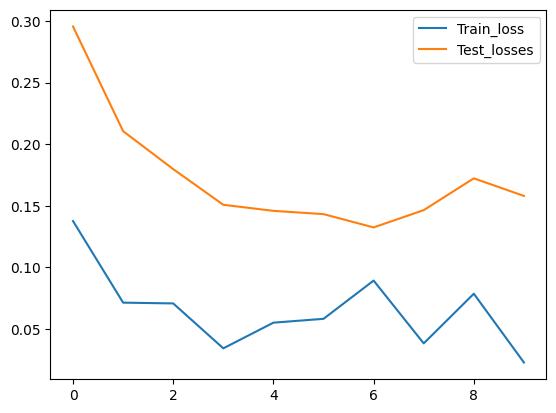

In [84]:
train_numpy_losses = [loss.detach().numpy() for loss in train_losses]
test_numpy_losses = [loss.detach().numpy() for loss in test_losses]
print(f"train_numpy_losses : {len(train_numpy_losses)}")
print(f"test_numpy_losses : {len(test_numpy_losses)}")
plt.plot(train_numpy_losses, label="Train_loss")
plt.plot(test_numpy_losses, label="Test_losses")
plt.legend()

In [85]:
train_acc = [t/600 for t in train_correct]
train_acc

[tensor(89.5817),
 tensor(95.3767),
 tensor(96.7217),
 tensor(97.5233),
 tensor(98.0250),
 tensor(98.3783),
 tensor(98.6517),
 tensor(98.9333),
 tensor(99.1000),
 tensor(99.2467)]

In [87]:
test_acc = [t/100 for t in test_correct]
test_acc

[tensor(94.3700),
 tensor(95.7900),
 tensor(96.9300),
 tensor(97.0900),
 tensor(97.4700),
 tensor(97.5900),
 tensor(97.7200),
 tensor(97.6300),
 tensor(97.5900),
 tensor(97.7700)]

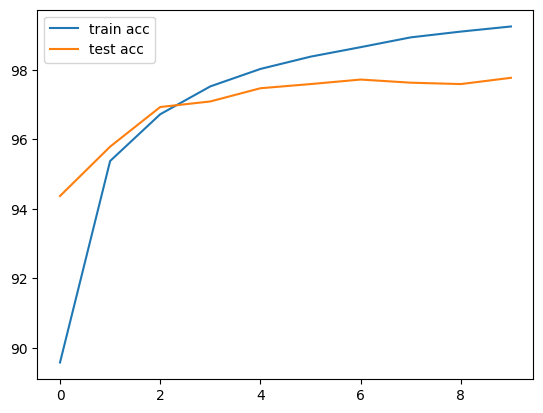

In [88]:
tmp_train_acc = [acc.detach().numpy() for acc in train_acc]
tmp_test_acc = [acc.detach().numpy() for acc in test_acc]
plt.plot(tmp_train_acc, label="train acc")
plt.plot(tmp_test_acc, label="test acc")
plt.legend()

In [89]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [107]:
#New Unseen data
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [108]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted == y_test).sum()

print(f"Test accuracy : {correct.item()}/{len(test_data)} = {correct.item()*100/len(test_data)}%")

Test accuracy : 9777/10000 = 97.77%


In [138]:
print(f" To print the index of the max element in that array in a list of list : {torch.max(y_val, 1)[1]}")
print(f"To print the index of the max value of a single list : {torch.argmax(y_val[0])}")

 To print the index of the max element in that array in a list of list : tensor([7, 2, 1,  ..., 4, 5, 6])
To print the index of the max value of a single list : 7


In [131]:
type(y_val[0])

torch.Tensor

#### Confusion Matrix

In [110]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[ 972,    0,    5,    0,    1,    2,    6,    3,    5,    3],
       [   0, 1126,    2,    0,    0,    0,    3,    7,    0,    2],
       [   0,    3, 1004,    4,    1,    0,    2,    9,    2,    0],
       [   3,    2,    4,  989,    0,    9,    1,    1,    3,    2],
       [   0,    0,    2,    0,  964,    3,    2,    2,    2,   11],
       [   0,    0,    0,    6,    0,  865,    5,    0,    3,    3],
       [   2,    1,    3,    0,    7,    3,  938,    0,    1,    0],
       [   0,    0,    3,    2,    0,    0,    0,  983,    3,    0],
       [   3,    3,    9,    2,    1,    9,    1,    4,  951,    3],
       [   0,    0,    0,    7,    8,    1,    0,   19,    4,  985]])

#### Examine Misses

In [140]:
misses = np.array([])
for i in range(len(predicted)):
    if predicted[i] != y_test[i]:
        misses = np.append(misses, i).astype('int64')
len(misses)

223

In [141]:
misses[:10]

array([  80,   92,  149,  151,  247,  259,  321,  340,  445,  448])

In [119]:
predicted[0]

tensor(7)